# Debunking Seattle Traffic Myths

Every now and then, I run across an article that claims something that seems so contrary to my perceived daily experiences that I'm are forced to say, "Huh?".  That's the case with several articles posted by the [Sightline Institute]("http://www.sightline.org/") which claim that Seattle traffic has been steadily dropping since 2009.  Most notable to me was [this article]("http://www.sightline.org/2014/02/19/collapsing-traffic-on-the-alaskan-way-viaduct/") which boldy claims, "traffic volumes on the Alaskan Way Viaduct have *collapsed* since the state started its construction project".  The article goes on to posit that, "Seattle can survive, and even thrive, without a viaduct or a tunnel."

Really?  This I had to verify for myself.

In order to verify this claim, I dowloaded traffic data from both the Seattle Depratment of Transportation (SDOT) and from the Washington State Department of Transportaion (WSDOT).  The SDOT data I looked at were the "Traffic Flow Counts" data sets.  These contain a value named "AAWDT" which is described on the data.seattle.gov website as being the, "seasonally adjusted average weekday daily total of vehicle traffic for all lanes, i.e. total vehicles in both directions for one average 24-hour business day, Monday through Friday."

This data set contains traffic counts for 256 locations in Seattle, of which 4 of them are on and off-ramps to the Alaskan Way viaduct.  It does not contain counts on Hwy. 99 itself, but we will look at data from WSDOT later that contains these values.  For now, it seems reasonable to assume that changes in the volume of traffic on 4 of the major on/off-ramps would be positively correlated to the overall volume on the entire viaduct.

Here is what that data looks like:

![Figure 1.](./ramp_summary2.png)

In [1]:
!head -n1 SDOT_2007_Traffic_Flow_Counts.csv | \
awk -F"," '{print $4"|"$5"|" $6"|"$8"|"$9"|"$11"|"$12}'

!grep -w "ALASKAN WY VI" SDOT_2007_Traffic_Flow_Counts.csv | \
awk -F"," '{print $4"|"$5"|"$6"|"$8"|"$9"|"$11"|"$12}' | sort -n

GEOBASID|DOWNTOWN|COMPKEY|OID_|NAME|SEGKEY|AAWDT
60150010|Y|9738|250|"COLUMBIA ST ON RP NE/O ALASKAN WY VI SB"|9738|9500
65700010|Y|10224|185|"ELLIOTT AV ON RP NW/O ALASKAN WY VI SB"|10224|16800
96200010|Y|12786|193|"SENECA ST OFF RP NE/O ALASKAN WY VI NB"|12786|10100
104300010|Y|13524|195|"WESTERN AV OFF RP NW/O ALASKAN WY VI NB"|13524|16700


We can use the GEOBASID to query the 2014 data set for the same locations

In [2]:
!head -n1 SDOT_2014_Traffic_Flow_Counts.csv | \
awk -F"," '{print $2"|"$5"|"$8"|"$10}'

!egrep -w '65700010|104300010|96200010|60150010' SDOT_2014_Traffic_Flow_Counts.csv | \
awk -F"," '{print $2"|"$5"|"$8"|"$10}' | sort -n

GEOBASID|STNAME|YEAR|AAWDT
60150010|COLUMBIA ST ON RP|2014|10700
65700010|ELLIOTT AV ON RP|2014|13600
96200010|SENECA ST OFF RP|2014|7800
104300010|WESTERN AV OFF RP|2014|16400


Now that we've identified the fields and records that we need, it's easier to work with them and analyze the data after we import it into Pandas.

In [2]:
# NEED TO GET THESE INTO PANDAS

import pandas as pd

# load separate CSV files into data frames and use the GEOBASID column as an index
data_2007 = pd.read_csv('SDOT_2007_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2008 = pd.read_csv('SDOT_2008_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2009 = pd.read_csv('SDOT_2009_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2010 = pd.read_csv('SDOT_2010_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2011 = pd.read_csv('SDOT_2011_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2012 = pd.read_csv('SDOT_2012_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2013 = pd.read_csv('SDOT_2013_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])
data_2014 = pd.read_csv('SDOT_2014_Traffic_Flow_Counts.csv', index_col=['GEOBASID'])

#pull just the AAWDT data for the 4 GEOBASID values we care about
alaska_way_vi_2007 = data_2007['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2008 = data_2008['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2009 = data_2009['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2010 = data_2010['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2011 = data_2011['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2012 = data_2012['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2013 = data_2013['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]
alaska_way_vi_2014 = data_2014['AAWDT'].loc[[60150010, 65700010, 96200010, 104300010]]

# Create new series with summed values and year as index entry
summed_data = pd.Series([alaska_way_vi_2007.sum(),
                         alaska_way_vi_2008.sum(),
                         alaska_way_vi_2009.sum(),
                         alaska_way_vi_2010.sum(),
                         alaska_way_vi_2011.sum(),
                         alaska_way_vi_2012.sum(),
                         alaska_way_vi_2013.sum(),
                         alaska_way_vi_2014.sum()],
                        index=[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])


/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


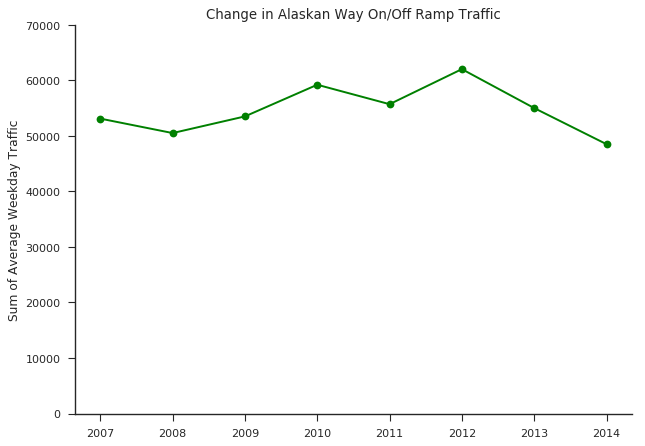

In [3]:
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'].insert(0, 'DejaVu Sans')
plt.style.use(['fivethirtyeight', 'seaborn-notebook'])

sb.set(style='ticks')
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(summed_data, color='green', marker='o', linestyle='solid')
plt.title("Change in Alaskan Way On/Off Ramp Traffic")
plt.ylabel("Sum of Average Weekday Traffic")
plt.ylim(ymin=0, ymax=70000) # SET THE MIN VALUE TO 0
sb.despine()

In [4]:
summed_data

2007    53100.0
2008    50500.0
2009    53500.0
2010    59200.0
2011    55700.0
2012    62009.0
2013    55000.0
2014    48500.0
dtype: float64

In [5]:
# Load data into data frame
wsdot_data = pd.read_csv('./WSDOT_R101N_2007-2017.csv')

# Diplay 2 rows and 10 columns from the loaded data
wsdot_data.iloc[:2,:10]

,SiteId,SiteLocation,Date,DayOfWeek,TravelDirection,Hour1,Hour2,Hour3,Hour4,Hour5
0,R101N,On SR 099 at milepost 29.37 A: N/O SPOKANE STR...,2007-06-23 00:00:00,Saturday,Southbound,692,564,449,207,221
1,R101N,On SR 099 at milepost 29.37 A: N/O SPOKANE STR...,2007-11-21 00:00:00,Wednesday,Southbound,396,251,214,154,314
